In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')


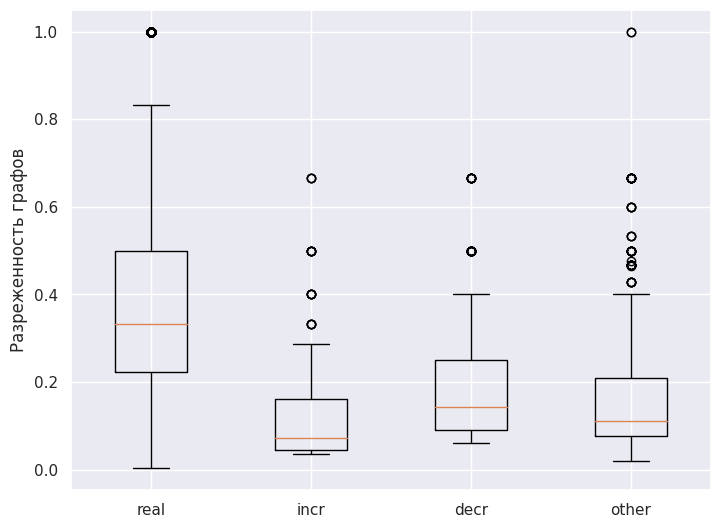

In [28]:
# graph sparity
data = []

for path in map(lambda x : x + "_sparity", ["statistic_by_type/pures", "statistic_by_type/incr", "statistic_by_type/decr", "statistic_by_type/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
ax.set_ylabel("Разреженность графов")
ax.set_xticklabels(["real", "incr", "decr", "other"])
plt.show()
# fig.savefig('sparity.jpg')


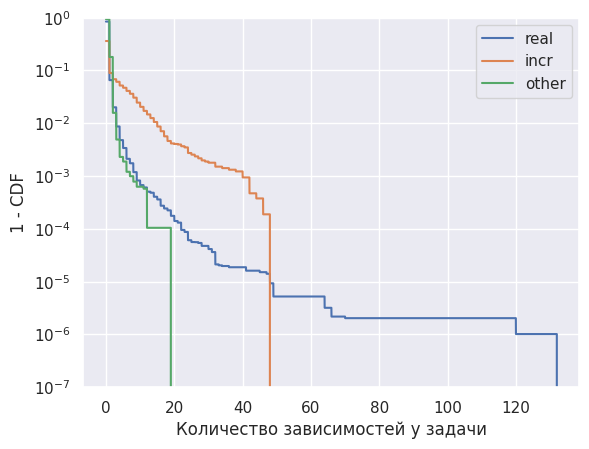

In [48]:
# out degree
data = []
for path in map(lambda x : x + "_out_deg", ["statistic_by_type/pures", "statistic_by_type/incr", "statistic_by_type/decr", "statistic_by_type/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure()

for i in range(4):
    if i == 2:
        continue
    data_l = np.array(sorted( data[i]))
    count, bins_count = np.histogram(data_l, bins=50000)
    
    pdf = count / sum(count)
    
    cdf = 1 - np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf,label=["real", "incr", "decr", "other"][i])
plt.ylim((10**-7,1.00001))
plt.yscale('log')
plt.legend()
plt.ylabel("1 - CDF")
plt.xlabel("Количество зависимостей у задачи")

plt.show()
# fig.savefig('out_degree.jpg')

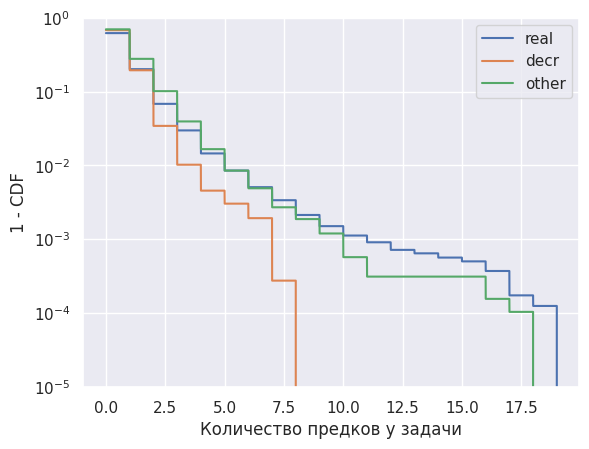

In [47]:
# in degree
data = []

for path in map(lambda x : x + "_in_deg", ["statistic_by_type/pures", "statistic_by_type/incr", "statistic_by_type/decr", "statistic_by_type/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure()


for i in range(4):
    if i == 1:
        continue
    data_l = np.array(sorted( data[i]))
    count, bins_count = np.histogram(data_l, bins=50000)
    
    pdf = count / sum(count)
    
    cdf = 1- np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf,label=["real", "incr", "decr", "other"][i])
plt.ylim((10**-5,1.00001))
plt.yscale('log')
plt.legend()
plt.ylabel("1 - CDF")
plt.xlabel("Количество предков у задачи")
plt.show()
# fig.savefig('in_degree.jpg')

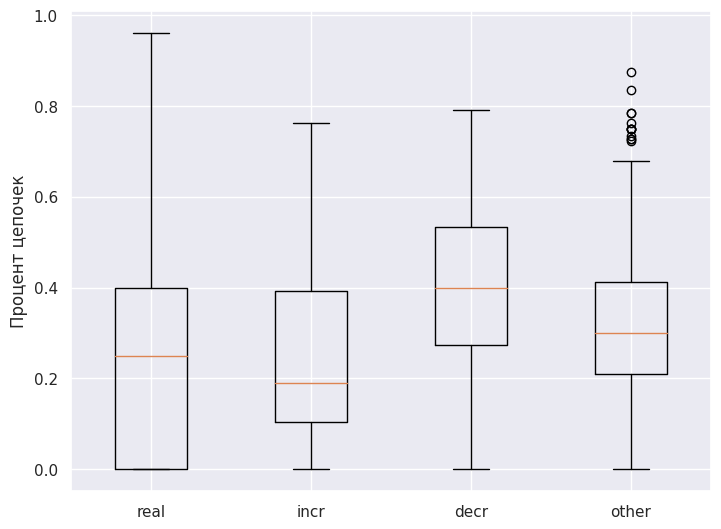

In [43]:
data = []

for path in map(lambda x : x + "_chain_ration", ["statistic_by_type/pures", "statistic_by_type/incr", "statistic_by_type/decr", "statistic_by_type/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)
ax.set_xticklabels(["real", "incr", "decr", "other"])
ax.set_ylabel("Процент цепочек")
plt.show()
# fig.savefig('chain_ratio.jpg')
# graph chain ratio

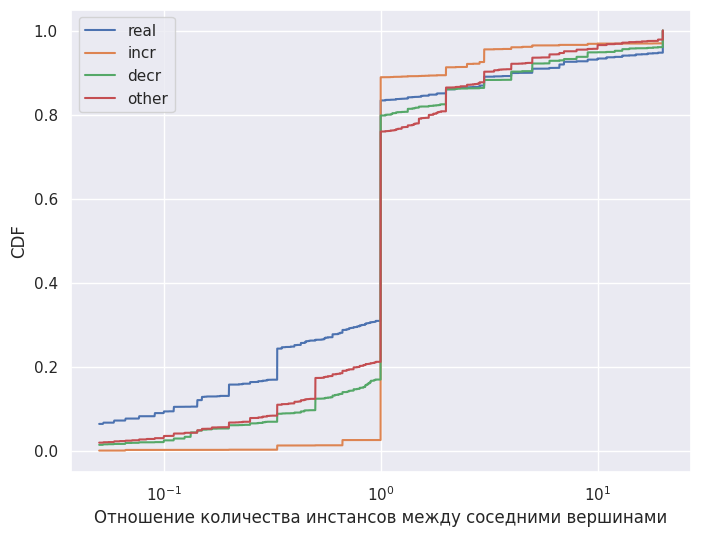

In [40]:
# pairwise ins raion
data = []

for path in map(lambda x : x + "_ins_ratio", ["statistic_by_type/pures", "statistic_by_type/incr", "statistic_by_type/decr", "statistic_by_type/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure(figsize =(8, 6))

for i in range(4):
    
    data_l = np.array(sorted( data[i]))
    count, bins_count = np.histogram(data_l, bins=50000)
    
    pdf = count / sum(count)
    
    cdf =  np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf,label=["real", "incr", "decr", "other"][i])

plt.xscale('log')
plt.legend()
plt.ylabel("CDF")
plt.xlabel("Отношение количества инстансов между соседними вершинами")
plt.show()
# fig.savefig('ins_ratio.jpg')

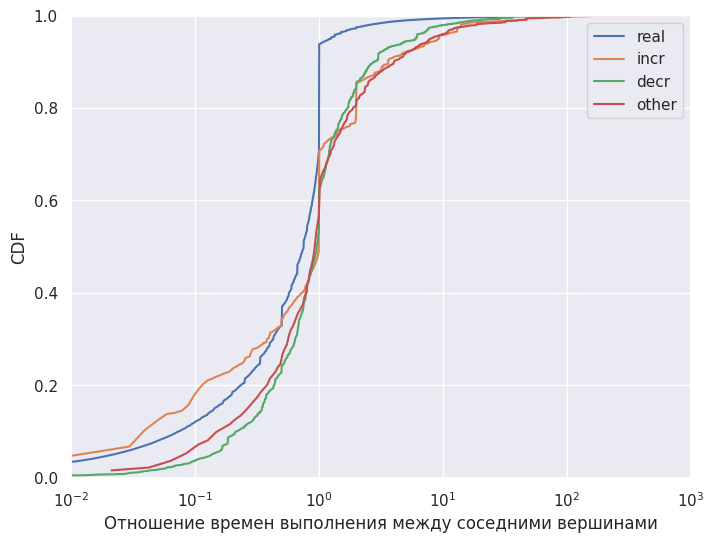

In [41]:
# pairwise flops raion
data = []

for path in map(lambda x : x + "_time_ratio", ["statistic_by_type/pures", "statistic_by_type/incr", "statistic_by_type/decr", "statistic_by_type/other"]):
    with open(path , 'r') as f:
        array = np.array(f.readline().split(' ')[:-1], dtype=np.float64)
        data.append(array)

fig = plt.figure(figsize =(8, 6))

for i in range(4):

    
    data_l = np.array(sorted( data[i]))
    count, bins_count = np.histogram(data_l, bins=5000000 if i == 0 else 50000)
    
    pdf = count / sum(count)
    
    cdf =  np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf,label=["real", "incr", "decr", "other"][i])
plt.xscale('log')
plt.ylim((0, 1))
plt.xlim((10**-2, 10**3))
plt.ylabel("CDF")
plt.xlabel("Отношение времен выполнения между соседними вершинами")
plt.legend()

plt.show()
# fig.savefig('time_ratio.jpg')